In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
census_dataset = pd.read_csv('../datasets/2011-census-microdata/2011-census-microdata-tiny.csv')

In [69]:
# Synthetic Datasets
privbayes = pd.read_csv('../synth-output/2011-census-test-1-privbayes/synthetic_data_1.csv')
CTGAN = pd.read_csv('../synth-output/2011-census-test-2-CTGAN/synthetic_data_2.csv')
synthpop_sampled = pd.read_csv('../synth-output/2011-census-test-3-synthpop/synthetic_data_3.csv')
synthpop_cart = pd.read_csv('../synth-output/2011-census-test-5-synthpop-cart/synthetic_data_4.csv')
# sgf = pd.read_csv('../synth-output/2011-census-test-4-sgf/synthetic_data_5.csv')

In [6]:
interesting_columns = [i for i in list(census_dataset.columns) if i != 'Person ID' and i != 'Residence Type']

# Synthetic data comparison

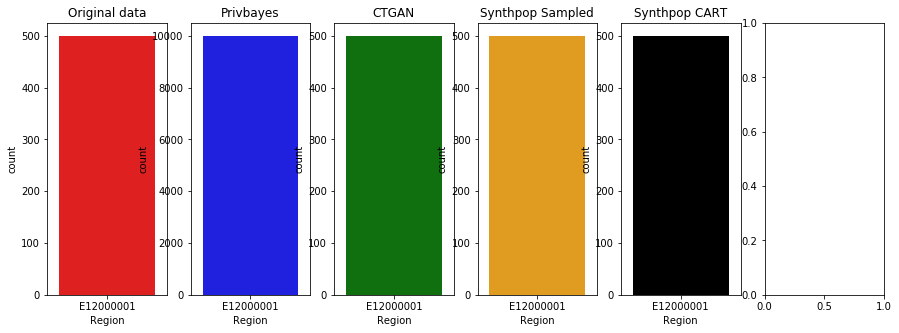

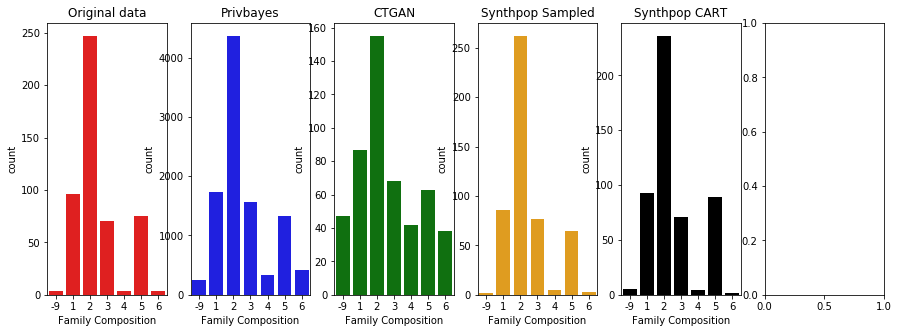

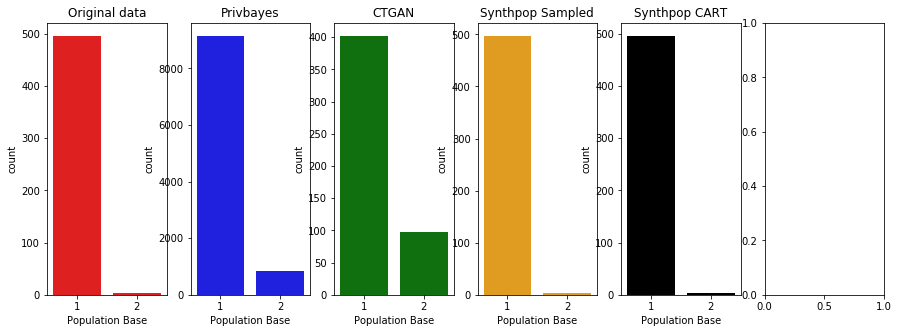

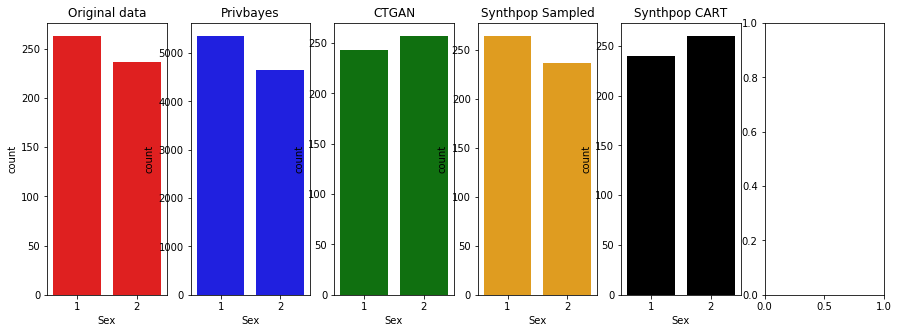

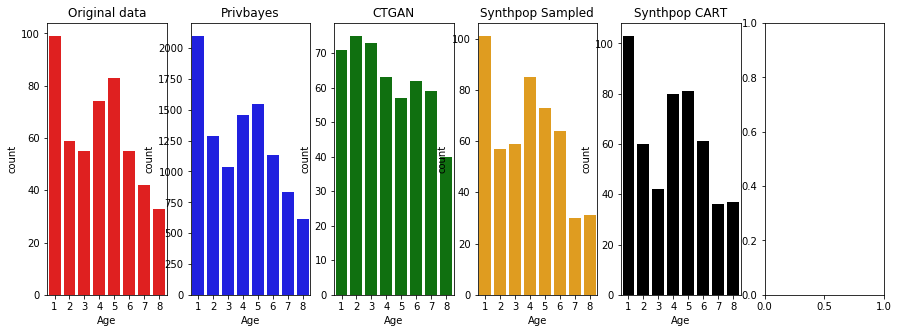

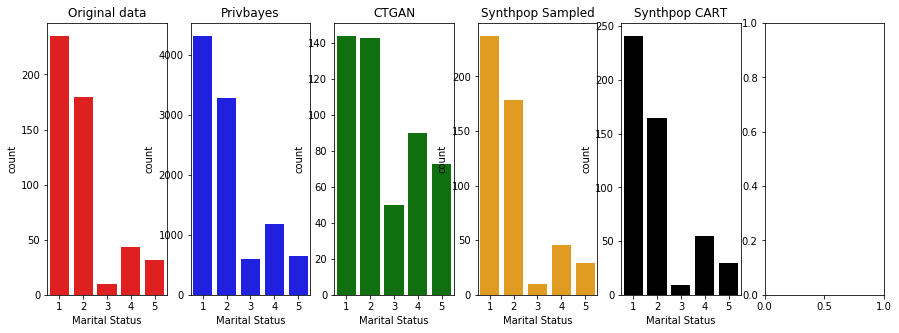

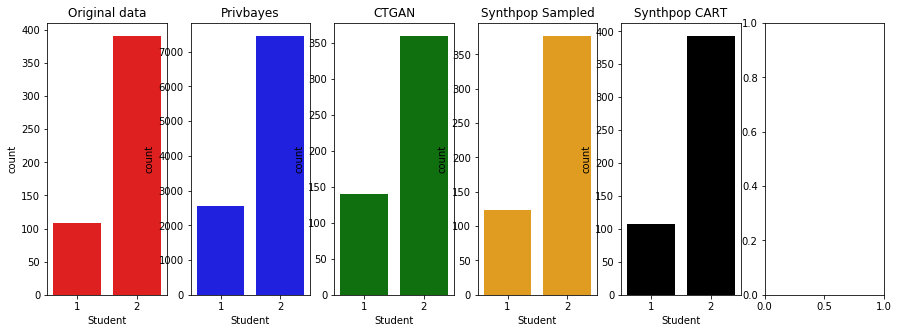

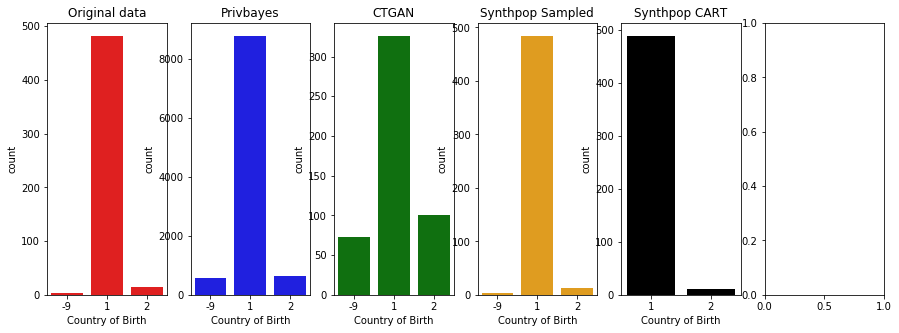

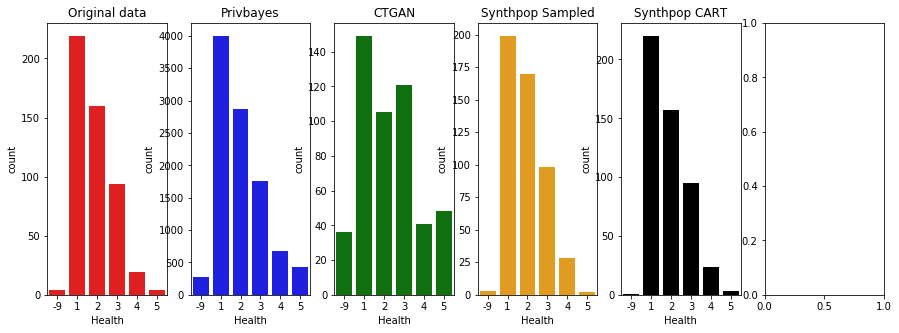

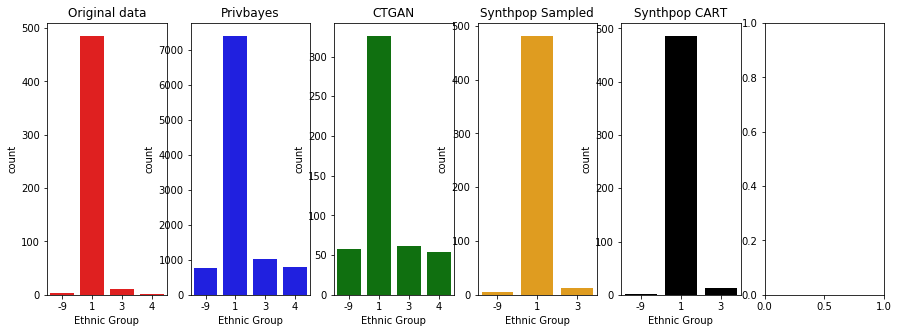

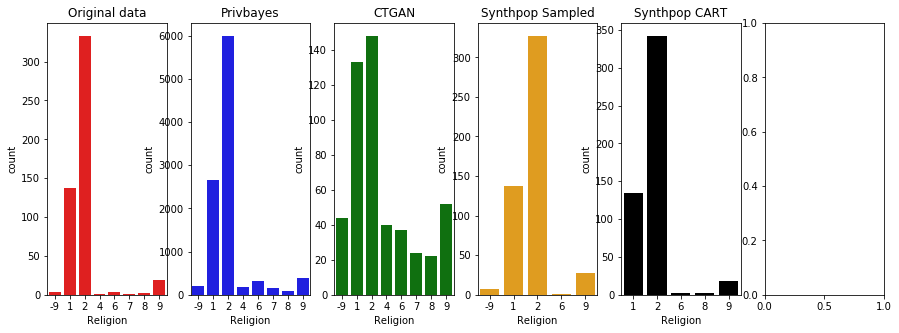

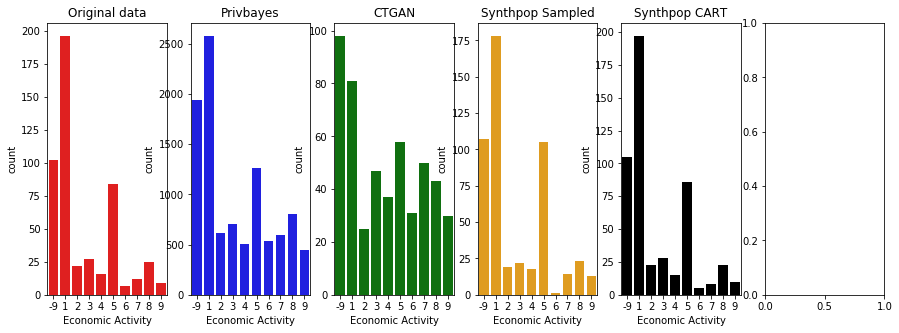

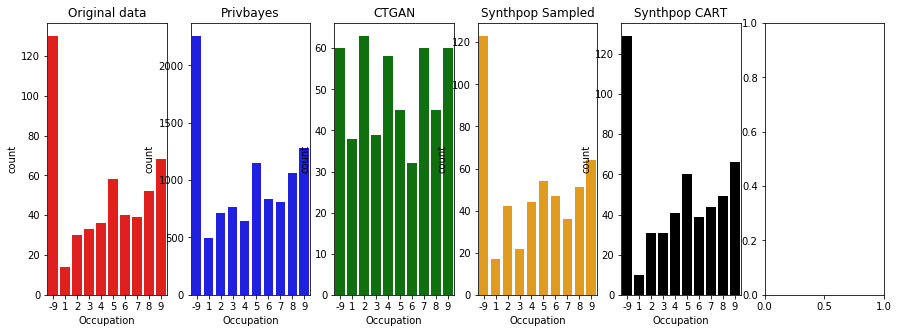

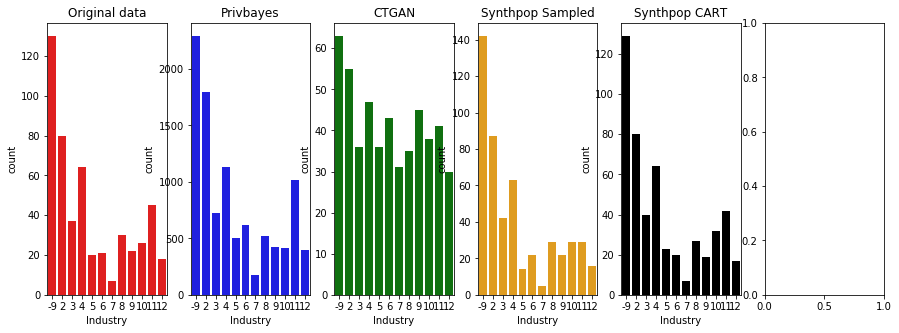

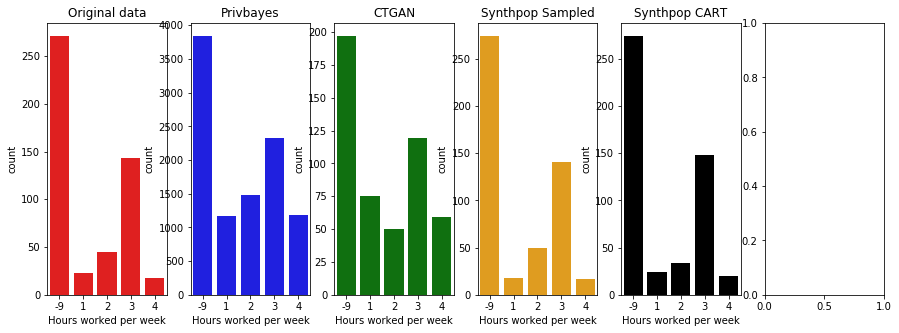

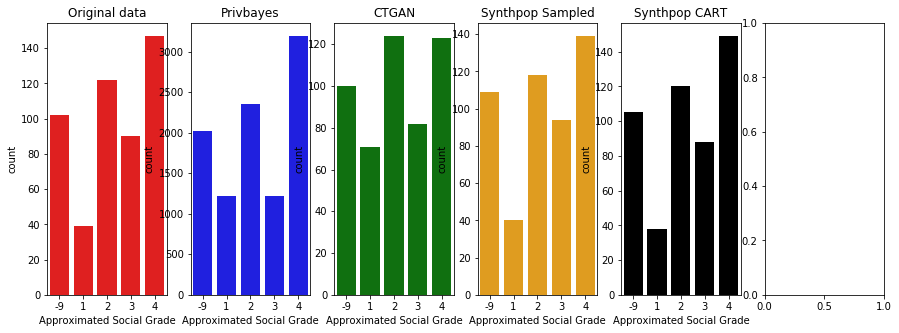

In [71]:
for col in interesting_columns: # normalise y axis if possible
    fig, ax = plt.subplots(1,6, sharey=False)
    sns.countplot(data=census_dataset, x=col, color='red', ax=ax[0])
    ax[0].set_title("Original data")
    sns.countplot(data=privbayes, x=col, color='blue', ax=ax[1])
    ax[1].set_title("Privbayes")
    sns.countplot(data=CTGAN, x=col, color='green', ax=ax[2])
    ax[2].set_title("CTGAN")
    sns.countplot(data=synthpop_sampled, x=col, color='orange', ax=ax[3]) 
    ax[3].set_title("Synthpop Sampled")
    sns.countplot(data=synthpop_cart, x=col, color='black', ax=ax[4])
    ax[4].set_title("Synthpop CART")
#     sns.countplot(data=sgf, x=col, color='brown', ax=ax[5])
#     ax[5].set_title("SGF")
    fig.set_size_inches(15, 5)

# Disclosure risk comparison

In [78]:
risks = {}
with open('../synth-output/2011-census-test-1-privbayes/disclosure_risk.json') as jsonFile:
    risks['Privbayes'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/disclosure_risk.json') as jsonFile:
    risks['CTGAN'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/disclosure_risk.json') as jsonFile:
    risks['Synthpop Sampled'] = json.load(jsonFile)
    jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/disclosure_risk.json') as jsonFile:
#     risks['SGF'] = json.load(jsonFile)
#     jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART'] = json.load(jsonFile)
    jsonFile.close()

In [79]:
pd.DataFrame.from_dict(risks).T

,EMRi,TMRi,TMRa,EMRi_norm,TMRi_norm
Privbayes,0.002646,0.0,NaN,0.000132,0.0
CTGAN,0.000000,0.0,0.0,0.000000,0.0
Synthpop Sampled,0.000000,0.0,0.0,0.000000,0.0
Synthpop CART,0.000000,0.0,0.0,0.000000,0.0


# Utility comparison

In [17]:
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_o_o.json') as jsonFile:
    synthpop_cart_utility_o_o = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_r_o.json') as jsonFile:
    synthpop_cart_utility_r_o = json.load(jsonFile)
    jsonFile.close()

In [18]:
d = [synthpop_cart_utility_o_o['LogisticRegression'], synthpop_cart_utility_r_o['LogisticRegression']]
pd.DataFrame(data=d)

,accuracy,precision,recall,f1
0,{'value': 38.666666666666664},"{'macro': 17.147857016278067, 'weighted': 58.2...","{'macro': 62.0532185742514, 'weighted': 38.666...","{'macro': 13.913060271112046, 'weighted': 46.2..."
1,{'value': 38.666666666666664},"{'macro': 18.759873167767903, 'weighted': 63.9...","{'macro': 43.17514083139082, 'weighted': 38.66...","{'macro': 16.53303290455682, 'weighted': 46.62..."
